In [17]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [6]:
path = "heart.csv"
data = pd.read_csv(path)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


EDA

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


C:\Users\Md. Ashfaq Bin Hoque\AppData\Local\Temp\ipykernel_19368\1498975870.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=data, palette='viridis')


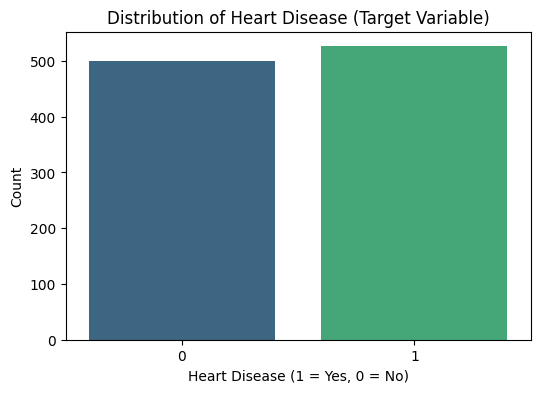

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=data, palette='viridis')
plt.title('Distribution of Heart Disease (Target Variable)')
plt.xlabel('Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

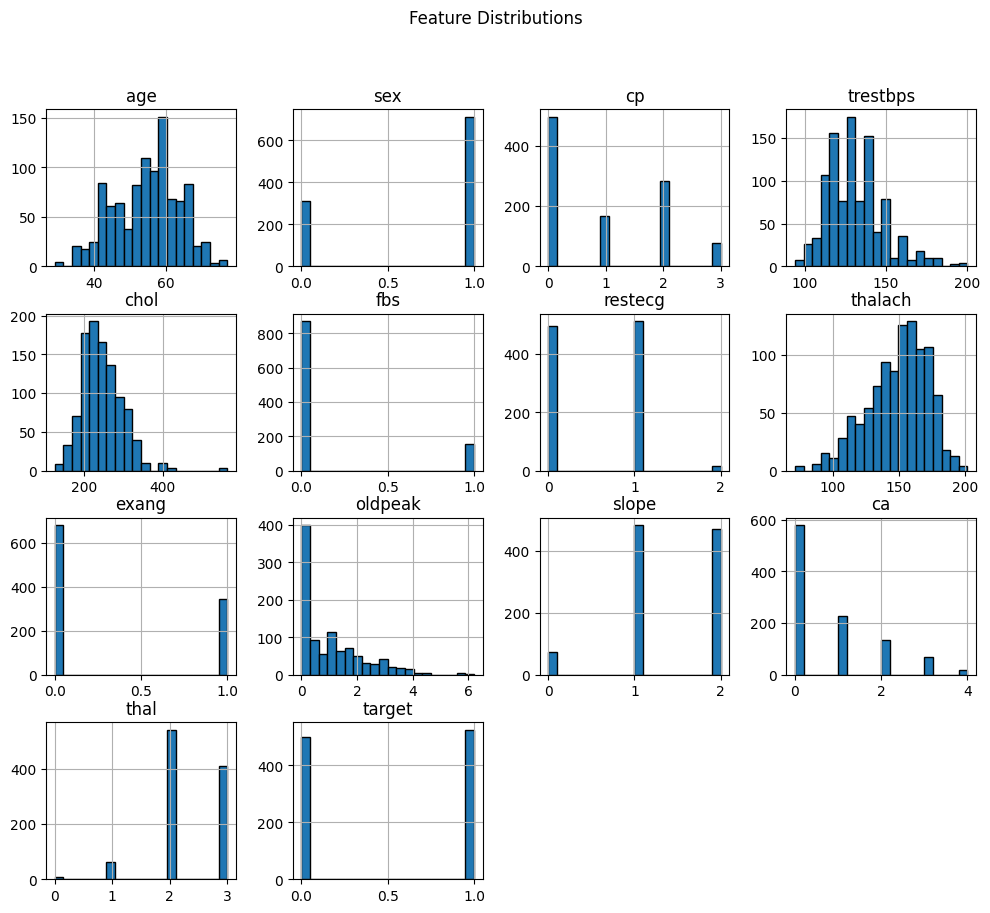

In [13]:
data.hist(figsize=(12,10), bins=20, edgecolor='black')
plt.suptitle('Feature Distributions')
plt.show()

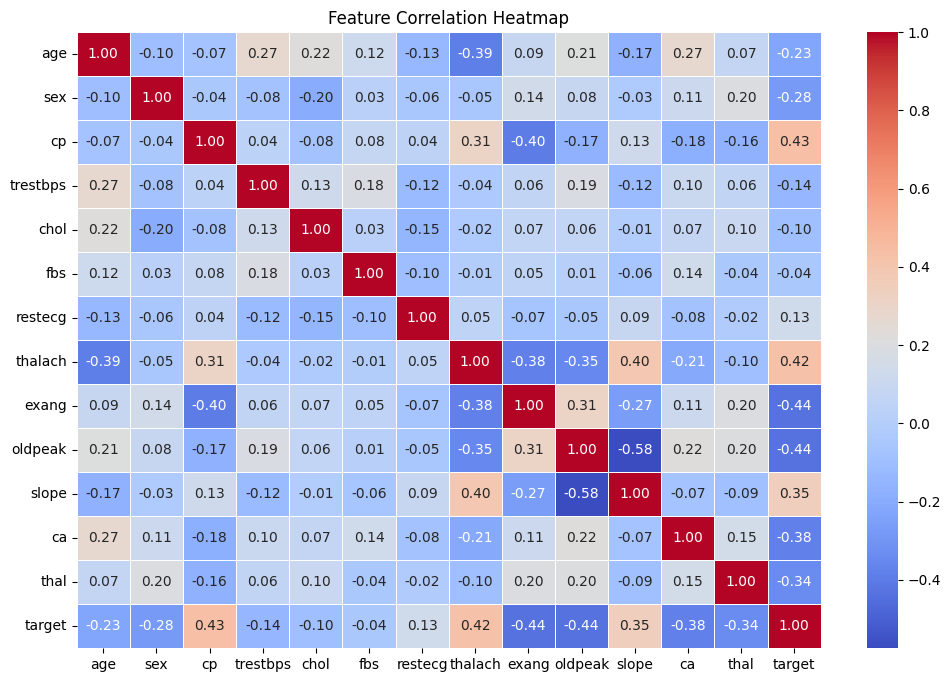

In [14]:
plt.figure(figsize=(12,8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

In [19]:
X = data.drop(columns='target')
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

In [25]:
classifiers = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(random_state=42)
}

In [ ]:
params = {
            'random_state': 42,
            'max_depth': 5,
            'min_samples_split': 10
        }
clf = DecisionTreeClassifier(
            random_state=params['random_state'],
            max_depth=params['max_depth'],
            min_samples_split=params['min_samples_split'],
        ) 
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled) 
accuracy =  accuracy_score(y_test, y_pred)
precision =  precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
metrics_dict = {
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1': f1,
}
print(metrics_dict)
#just tuning some hyper parameters that i applied on my pipeline to see if the evaluation metrics are same

{'accuracy': 0.9853658536585366, 'precision': 1.0, 'recall': 0.970873786407767, 'f1': 0.9852216748768473}


In [33]:
results = []
for name, classifier in classifiers.items():
    start_time = time.time()
    # Train model
    classifier.fit(X_train_scaled, y_train)
    # Make predictions
    y_pred = classifier.predict(X_test_scaled) 
    # Calculate metrics
    metrics = {
        "Algorithm": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "Training Time (s)": time.time() - start_time
    }
    results.append(metrics)

results_df = pd.DataFrame(results)
results_df.sort_values(by='F1 Score', ascending=False, inplace=True)

In [30]:
results_df.sample(len(results_df))

,Algorithm,Accuracy,Precision,Recall,F1 Score,Training Time (s)
5,Gradient Boosting,0.931707,0.915888,0.951456,0.933333,0.142113
4,Random Forest,0.985366,1.000000,0.970874,0.985222,0.133024
2,Support Vector Machine,0.887805,0.850877,0.941748,0.894009,0.020979
3,Decision Tree,0.985366,1.000000,0.970874,0.985222,0.009000
1,K-Nearest Neighbors,0.834146,0.800000,0.893204,0.844037,0.021018
7,XGBoost,0.985366,1.000000,0.970874,0.985222,0.299204
6,Naive Bayes,0.800000,0.754098,0.893204,0.817778,0.006935
0,Logistic Regression,0.795122,0.756303,0.873786,0.810811,0.049711


C:\Users\Md. Ashfaq Bin Hoque\AppData\Local\Temp\ipykernel_19368\2033943800.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='F1 Score', y='Algorithm', data=results_df, palette='viridis')


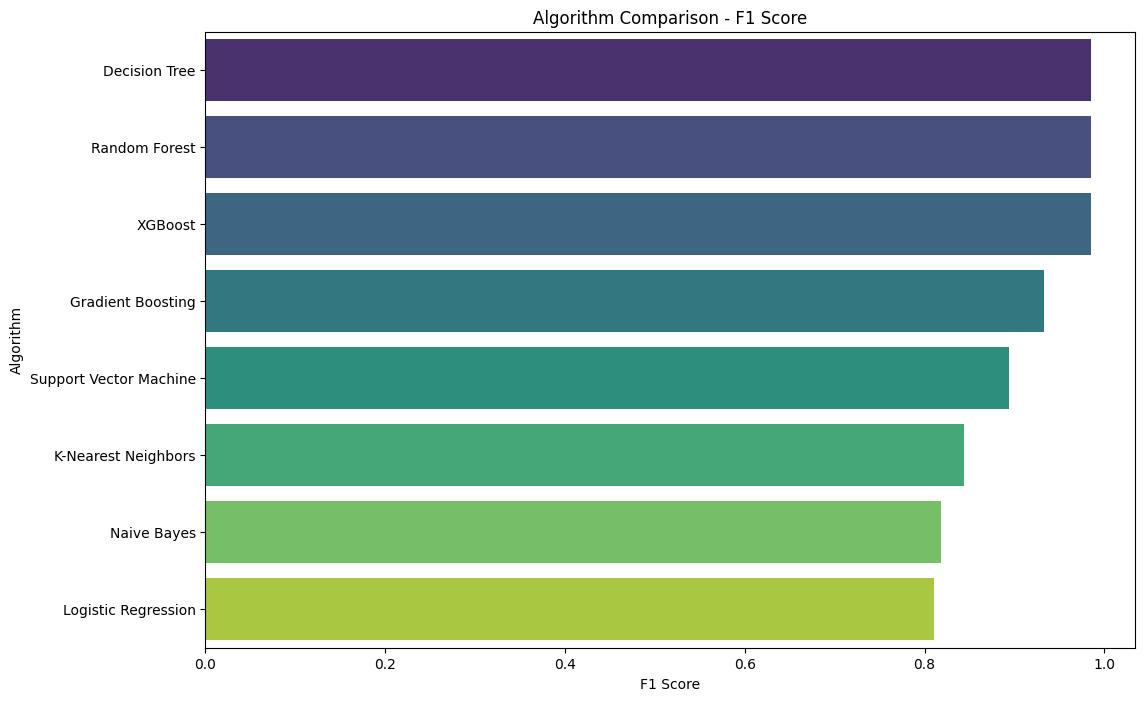

In [27]:
plt.figure(figsize=(12, 8))
sns.barplot(x='F1 Score', y='Algorithm', data=results_df, palette='viridis')
plt.title('Algorithm Comparison - F1 Score')
plt.xlabel('F1 Score')
plt.ylabel('Algorithm')
plt.show()